### Computational Economics
Alexander Skorobogatov

# Topic 6.1. Structural Vector Auto-Regression Model: an example

Wang et al. analyse the dynamic relationships among four oil-related variables.  
For the details of the analysis, see [their paper](https://github.com/askorobogat/CompEcon/blob/main/Wang%20et%20al.(2013).pdf) as well as the paper by [Kilian & Park](https://github.com/askorobogat/CompEcon/blob/main/Kilian_and_Park(2009).pdf) from which they borrow their methodology.

Their dataset and method are described as follows:

![alt text](Wang.jpg "Title")

In [29]:
# To reproduce their analysis, let's take their dataset
url = 'https://github.com/askorobogat/CompEcon/raw/main/Final_data.csv'

For the info for the variables, see [readme](https://github.com/askorobogat/CompEcon/blob/main/readme.txt)

In [30]:
import csv
import pandas as pd
import numpy as np
from pandas import Series
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, SVAR
import matplotlib.pyplot as plt

# 1. Convert data to the form described in Wang et al. 2013

# read the data from csv file and take difference of logs
df = pd.read_csv(url)
df = df[['CRUDEPROD','ACTIVITY','WTIUSD','MOEXRUB']]
data = pd.DataFrame(np.log(df).diff())
data.ACTIVITY = pd.DataFrame(df.ACTIVITY).diff()

C:\Users\Alex\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [31]:
data

,CRUDEPROD,ACTIVITY,WTIUSD,MOEXRUB
0,NaN,NaN,NaN,NaN
1,0.005521,-15.846392,-0.040274,-0.277803
2,-0.001707,7.026989,-0.060313,0.109123
3,-0.002018,-6.928847,0.015097,0.003453
4,-0.007914,-0.390100,-0.029083,0.034790
...,...,...,...,...
245,0.006348,4.495094,-0.030615,-0.003108
246,0.006673,19.909713,0.044804,-0.001320
247,0.005852,3.510751,-0.042008,0.010291
248,-0.001188,-16.597292,0.031386,0.011355


In [32]:
# 3. SVAR Estimates

# Matrices A B
A = np.asarray([[1,0,0,0],['E',1,0,0],['E','E',1,0],['E','E','E',1]])
B = np.asarray([['E',0,0,0],[0,'E',0,0],[0,0,'E',0],[0,0,0,'E']])

# Model and results
mymodel = SVAR(data, svar_type='AB', A=A, B=B, missing='drop')
res = mymodel.fit(maxlags=6, maxiter=10000, maxfun=10000, solver='powell')

C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method powell is: xtol, ftol, maxfun, start_direc. The list of unsupported keyword arguments passed include: gtol. After release 0.14, this will raise.
  warnings.warn(


In [34]:
# Estimated matrix A
res.A

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-3.66399708e+01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.07145999e+00, -7.52547277e-04,  1.00000000e+00,
         0.00000000e+00],
       [-4.45849150e-01, -5.88943244e-04, -2.13605424e-01,
         1.00000000e+00]])

In [35]:
# Estimated matrix B
res.B

array([[-7.85863775e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.78620344e+01,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  8.21395663e-02,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.58150958e-02]])

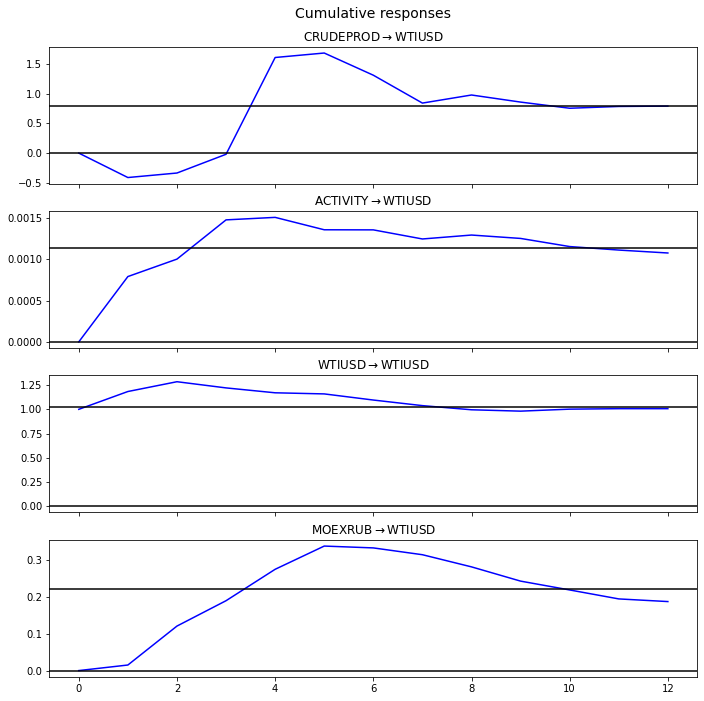

In [36]:
# 4. Cumulative Responses of real oil price to structural shocks

res.irf(periods=12).plot_cum_effects(response='WTIUSD',plot_stderr=False)
plt.show()

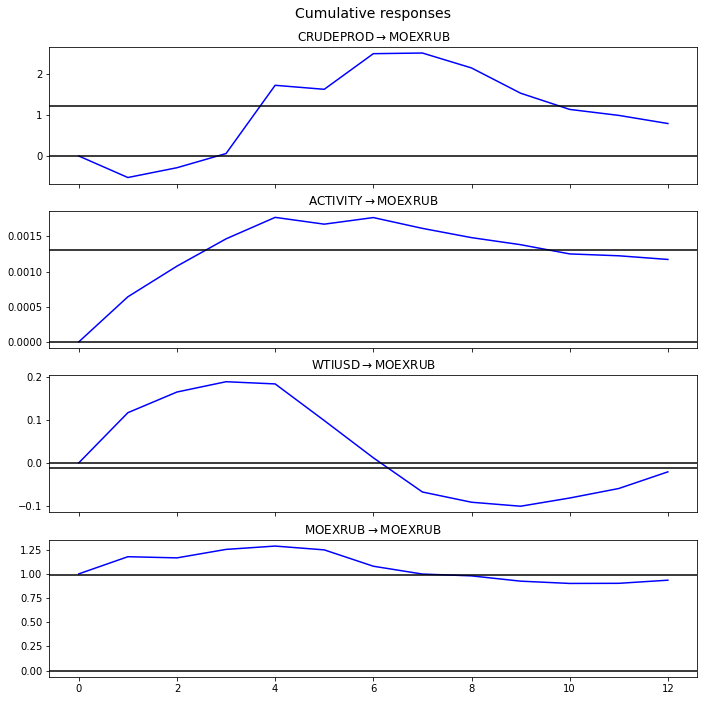

In [37]:
# 5. Cumulative Responses of stock returns to structural shocks

res.irf(periods=12).plot_cum_effects(response='MOEXRUB',plot_stderr=False)
plt.show()

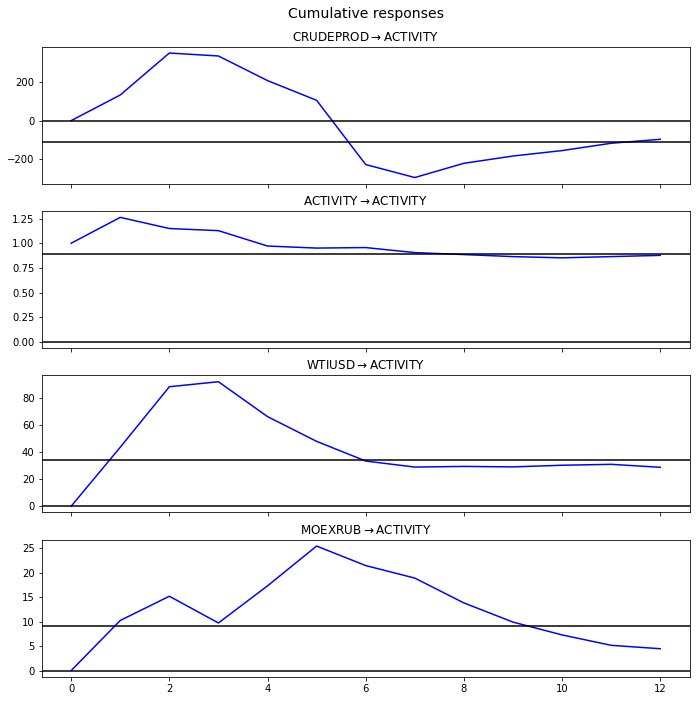

In [38]:
# 5. Cumulative Responses of stock returns to structural shocks

res.irf(periods=12).plot_cum_effects(response='ACTIVITY',plot_stderr=False)
plt.show()